# Homework #3.1: Logistic Regression

In this homework you will learn the concepts of logistic regression by implementing it.

Implement the body of each function and test whether you have done right for each of them or not by running the tests. Each function has a test code block just below its definition.

- Remember: **m** = number of data items (size of the data set) and **n** = number of features

Good luck!

In [2]:
# import what we need

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Sigmoid

Sigmoid is a non linear function defined as:

$$ g(z) = \frac{1}{1 + e^{-z}} $$

![sigmoid](../images/logistic-regression/sigmoid.png)

and its derivation is:

$$ g'(z) = g(z)(1 - g(z)) $$

In [9]:
def sigmoid(z):
    """
    Sigmoid function
    
    z: an arbitrary matrix (a x b)
    
    Return: a matrix (a x b) containing sigmoid of each element of z (element wise sigmoid values)
    """
    # YOUR CODE GOES HERE (~ 1 line of code)
    return 1/(1+np.exp(-z))
    

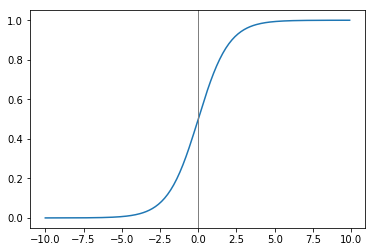

In [10]:
# test the sigmoid function by visualization

x = np.arange(-10, 10, .1)
y = sigmoid(x)
plt.plot(x, y)
plt.axvline(0, c='gray', linewidth=1)

## Hypothesis Function

For a single data item $ x_{1 \times n} $, the hypothesis is the sigmoid of the linear product of $ w_{n \times 1} $ and $ x_{1 \times n} $ in addition to bias $ b_{1 \times 1} $. The result is a number:

$$ h_{w,b}(x) = g(w^Tx + b) = \frac{1}{1 + e^{-w^Tx + b}} $$

For a data set $ X_{m \times n} $ which contains multiple data items stacking vertically, the result is a vector $ h_{m \times 1} $ which contains predections for all data items:

$$ h_{w,b}(X) = g(Xw + b) = \frac{1}{1 + e^{-Xw + b}} $$

In [15]:
def h(X, w, b):
    """
    The hypothesis function
    
    X: the data set matrix (m x n)
    w: the weights vector (n x 1)
    b: the bias (1 x 1)
    
    Return: a vector stacking predictions for all data items (m x 1)
    """
    # YOUR CODE GOES HERE (~ 1 line of code)
    return sigmoid(X.dot(w)+b)

In [16]:
# test the hypothesis

X, y, w, b = (np.array([[.1, .2, .3], [.4, .5, .6]]), np.array([[1], [0]]), np.array([[.3], [.4], [.5]]), .5)

hyp = h(X, w, b)
true = np.array([[0.68135373], [0.75398872]])

assert hyp.shape == (X.shape[0], 1), \
       'The result should be in shape ({}, 1). Currently is {}'.format(X.shape[0], hyp.shape)

if np.allclose(hyp, true):
    print('Hypothesis ok.')
else:
    print('Hypothesis does not work properly.')

Hypothesis ok.


## Cost Function

Cost function for a logistic regression model is [Cross Entropy](https://en.wikipedia.org/wiki/Cross_entropy) over data set:

$$ \begin{equation}
   \begin{split}
   J_{w,b}(X) &= -\frac{1}{m}\sum_{i=1}^m y^{(i)} \log(h_{w,b}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{w,b}(x^{(i)})) \\
   &= -\frac{1}{m}\sum_{i=1}^m y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})
   \end{split}
   \end{equation} $$

The goal of logistic regression is to minimize this cost.

In [20]:
def cost(y_true, y_pred):
    """
    Cross Entropy function
    
    y_true: the vector of true labels of data items (m x 1)
    y_pred: the vector of predictions of data items (m x 1)
    
    Return: a single number representing the cost
    """
    # YOUR CODE GOES HERE (~ 2 lines of code)
    zigma = (y_true.T).dot(np.log(y_pred)) + (1- y_true).T.dot(np.log(1-y_pred))
    return (-1/y_true.shape[0])*zigma


In [21]:
# test cost function

from sklearn.metrics import log_loss

X, y, w, b = (np.array([[.1, .2, .3], [.4, .5, .6]]), np.array([[1], [0]]), np.array([[.3], [.4], [.5]]), .5)

cre = log_loss(y, h(X, w, b))
cst = cost(y, h(X, w, b))

if np.isclose(cre, cst):
    print('Cost function ok.')
else:
    print('Cost function does not work properly.')
    print('Should\'ve returned:', cre)
    print('Returned:', cst)

Cost function ok.


## Gradient Descent

Gradient descent algorithm tries to find the minimum of a function by starting somewhere on the function and taking small steps through the gradient of the function.

In logistic regression, the function we are trying to minimize is the cost function $ J_{w,b}(X) $. The derivations are:

$$ \begin{equation}
   \begin{split}
       \frac{\partial J_{w,b}(X)}{\partial w_j}
       &= \frac{1}{m}\sum_{i=1}^m (h_{w,b}(x^{(i)}) - y^{(i)})x_j^{(i)} \\
       &= \frac{1}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})x_j^{(i)}
   \end{split}
   \end{equation} $$
   
$$ \begin{equation}
   \begin{split}
       \frac{\partial J_{w,b}(X)}{\partial b}
       &= \frac{1}{m}\sum_{i=1}^m (h_{w,b}(x^{(i)}) - y^{(i)}) \\
       &= \frac{1}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})
   \end{split}
   \end{equation} $$
   
- Actually these two derivations are the same except that in the second one, $ x_{0}^{(i)} = 1 $.
- This cost is similar to the cost of linear regression except that here, there is a sigmoid function over the hypothesis; i.e. $ h_{w,b}(x) = g(w^Tx + b) $.

In [26]:
def gradient(X, y_true, y_pred):
    """
    The gradient of cost function
    
    X: the data set matrix (m x n)
    y_true: the vector of true labels of data items (m x 1)
    y_pred: the vector of predictions of data items (m x 1)
    
    Return: vector dJ/dw (n x 1) and number dJ/db (1 x 1)
    """
    # YOUR CODE GOES HERE (~ 4 lines of code)
    dJdw = (1/y_true.shape[0])*(X.T).dot(y_pred - y_true)
    dJdb = (1/y_true.shape[0])*( (y_pred - y_true).sum() )
    return dJdw , dJdb

In [28]:
X, y, w, b = (np.array([[.1, .2, .3], [.4, .5, .6]]), np.array([[1], [0]]), np.array([[.3], [.4], [.5]]), .5)

true = (np.array([[0.13486543], [0.15663255], [0.17839968]]), 0.2176712251189869)
res = gradient(X, y, h(X, w, b))

if np.allclose(res[0], true[0]) and np.isclose(res[1], true[1]):
    print('Gradient function ok.')
else:
    print('Gradient function is not working properly.')
    print('should output:', true)
    print('Outputted:', res)

Gradient function ok.


In [60]:
def update_parameters(X, y_true, y_pred, w, b, alpha):
    """
    This function updates parameters w and b according to their derivations.
    It should compute the cost function derivations with respect to w and b first,
        then take a step for each parameters in w and b.
    
    X: the data set matrix (m x n)
    y_true: the vector of true labels of data items (m x 1)
    y_pred: the vector of predictions of data items (m x 1)
    w: the weights vector (n x 1)
    b: the bias (1 x 1)
    alpha: the learning rate
    
    Returns: the updated parameters w and b
    """
    # YOUR CODE GOES HERE (~ 4 lines of code)
    wnew = w - alpha * gradient(X, y_true, y_pred)[0]
    bnew = b - alpha * gradient(X, y_true, y_pred)[1]
    return wnew, bnew

In [61]:
# test update_parameters function

X, y, w, b = (np.array([[.1, .2, .3], [.4, .5, .6]]), np.array([[1], [0]]), np.array([[.3], [.4], [.5]]), .5)

res = update_parameters(X, y, h(X, w, b), w, b, 0.01)
true = (np.array([[0.29865135], [0.39843367], [0.498216]]), 0.49782328774881013)

if np.allclose(res[0], true[0]) and np.isclose(res[1], true[1]):
    print('Update parameters function ok.')
else:
    print('Update parameters function is not working properly.')
    print('should output:', true)
    print('Outputted:', res)

Update parameters function ok.


In [99]:
def gradient_descent(X, y, alpha, n_iterations):
    """
    The gradient descent algorithm:
        1. initialize parameters w and b to zeros (not random)
        for i in n_iterations:
            2. compute the hypothesis h(X, w, b)
            3. update the parameters using function update_parameters(X, y_true, y_pred, w, b, alpha)
            4. compute the cost and see the cost is decreasing in each step (optional)
            
    X: the data set matrix (m x n)
    y: the vector of true labels of data items (m x 1)
    alpha: the learning rate
    n_iterations: number of steps gradient descent should take to converge
    
    Returns: the best parameters w and b gradient descent found at last
    """
    # YOUR CODE GOES HERE (~ 7 lines of code)
    w = np.zeros(( X.shape[1], 1))
    b = 0
    for i in range(n_iterations):
        y_pred = h(X, w, b)
        w, b=update_parameters(X, y, y_pred, w, b, alpha)
        print("step {}: cost = {}".format( i, cost(y, y_pred) ) )
    return w, b

In [100]:
# test gradient_descent function

true = (np.array([[-0.01488461], [-0.014848], [-0.0148114]]), 0.00036601406503539797)
res = gradient_descent(X, y, 0.01, 20)

if np.allclose(res[0], true[0]) and np.isclose(res[1], true[1]):
    print('Gradient descent function ok.')
else:
    print('Gradient descent function is not working properly.')
    print('should output:', true)
    print('Outputted:', res)

step 0: cost = [[ 0.69314718]]
step 1: cost = [[ 0.69297852]]
step 2: cost = [[ 0.69281023]]
step 3: cost = [[ 0.6926423]]
step 4: cost = [[ 0.69247473]]
step 5: cost = [[ 0.69230752]]
step 6: cost = [[ 0.69214067]]
step 7: cost = [[ 0.69197417]]
step 8: cost = [[ 0.69180803]]
step 9: cost = [[ 0.69164223]]
step 10: cost = [[ 0.69147678]]
step 11: cost = [[ 0.69131168]]
step 12: cost = [[ 0.69114691]]
step 13: cost = [[ 0.69098249]]
step 14: cost = [[ 0.69081841]]
step 15: cost = [[ 0.69065467]]
step 16: cost = [[ 0.69049125]]
step 17: cost = [[ 0.69032817]]
step 18: cost = [[ 0.69016542]]
step 19: cost = [[ 0.690003]]
Gradient descent function ok.


## Test on Real Data

In [102]:
# load the data

from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
X, y = load_iris(return_X_y=True)
X = X[:, 0:2]
X = X[y != 2]
X = scale(X)
y = y[y != 2]
y = y.reshape((y.shape[0], 1))

In [103]:
# train a linear regression model from sklearn

from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y.ravel())

In [107]:
# train our linear regression model

w, b = gradient_descent(X, y, 0.1, 100)

step 0: cost = [[ 0.69314718]]
step 1: cost = [[ 0.66856338]]
step 2: cost = [[ 0.64542791]]
step 3: cost = [[ 0.62365148]]
step 4: cost = [[ 0.60314782]]
step 5: cost = [[ 0.58383428]]
step 6: cost = [[ 0.56563214]]
step 7: cost = [[ 0.54846689]]
step 8: cost = [[ 0.53226832]]
step 9: cost = [[ 0.51697058]]
step 10: cost = [[ 0.50251204]]
step 11: cost = [[ 0.48883527]]
step 12: cost = [[ 0.47588683]]
step 13: cost = [[ 0.46361708]]
step 14: cost = [[ 0.45197998]]
step 15: cost = [[ 0.44093291]]
step 16: cost = [[ 0.4304364]]
step 17: cost = [[ 0.42045394]]
step 18: cost = [[ 0.41095178]]
step 19: cost = [[ 0.40189869]]
step 20: cost = [[ 0.39326582]]
step 21: cost = [[ 0.38502647]]
step 22: cost = [[ 0.37715595]]
step 23: cost = [[ 0.36963141]]
step 24: cost = [[ 0.36243169]]
step 25: cost = [[ 0.3555372]]
step 26: cost = [[ 0.34892975]]
step 27: cost = [[ 0.34259251]]
step 28: cost = [[ 0.33650983]]
step 29: cost = [[ 0.33066717]]
step 30: cost = [[ 0.32505104]]
step 31: cost = [[ 0

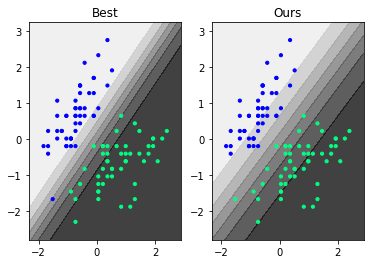

In [147]:
# plot the result

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z1 = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z2 = h(np.c_[xx.ravel(), yy.ravel()], w, b)

f, axes = plt.subplots(1, 2)

axes[0].contourf(xx, yy, Z1.reshape(xx.shape), cmap=plt.cm.binary, alpha=.8)
axes[1].contourf(xx, yy, Z2.reshape(xx.shape), cmap=plt.cm.binary, alpha=.8)
axes[0].scatter(X[:, 0], X[:, 1], c=model.predict(X), s=10, cmap=plt.cm.winter)
axes[1].scatter(X[:, 0], X[:, 1], c=h(X, w, b)[:,0] > .5, s=10, cmap=plt.cm.winter)

axes[0].set_title('Best');
axes[1].set_title('Ours');

Our hypothesis should be close to the best hypothesis. If they are not the same, raise `n_iterations` argument for our `gradient_descent` function and be careful of `alpha` the learning rate.

How well your logistic regression model is? How much happy are you!? :D